In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [48]:
nx   = 1001
xmin = 0
xmax = 10
T    = 2
x    = np.linspace(xmin,xmax,nx)
dt   = 0.05
dx   = (x.max()-x.min()) / (nx-1)
uu   = 0.5
g    = 9.81

print("dx: ",dx," dt: ",dt," u: ",u)
#print(x)
Courant = u*dt/dx
print ('Courant number: ',Courant)

dx:  0.01  dt:  0.05  u:  [0. 0. 0. ... 0. 0. 0.]
Courant number:  [0. 0. 0. ... 0. 0. 0.]


In [49]:
h = 0*x
h = np.where(x<=xmax/2,2,0.01)
hu = h*uu
print(h.shape,h.min(),h.max())
print(hu.shape,hu.min(),hu.max())

(1001,) 0.01 2.0
(1001,) 0.005 1.0


In [50]:
def addGhostCells(var,gleft,gright):
    return np.hstack([gleft,var,gright])

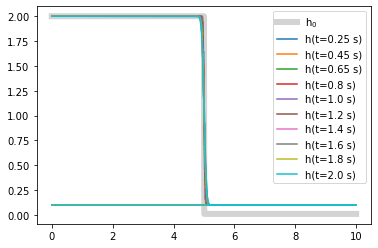

In [51]:
# Finite volume with Rusanov flux scheme
# start time
time   = 0
dtplot = 0.20
tplot  = dtplot
# initial values
h = np.where(x<=xmax/2,2,0.01)
hu = 0*x
x  = addGhostCells(x,0,0)
h  = addGhostCells(h,0,0)
hu = addGhostCells(hu,0,0)
plt.plot(x[1:-1],h[1:-1],linewidth=6,color='lightgray',label='h$_0$')

# solution
while (time < T):
    time = time + dt
    # neumann bc
    h[0]  = h[1]
    h[-1] = h[-2]
    hu[0]  = hu[1]
    hu[-1] = hu[-2]
    
    h = np.maximum(0.1,h)
    u = hu/h
    
    Fhup = h[1:]*u[1:]
    Fhum = h[:-1]*u[:-1]
    Rh   = (Fhup+Fhum)/2 - dx/dt/2*(h[1:]-h[:-1])
    h[1:-1] = h[1:-1] - dt/dx*(Rh[1:]-Rh[:-1])
    
    Fhu2p = hu[1:]*u[1:]    #+ 0.5*g*h[1:]*h[1:]
    Fhu2m = hu[:-1]*u[:-1] #+ 0.5*g*h[:-1]*h[:-1]
    Rhu  = (Fhu2p+Fhu2m)/2 - dx/dt/2*(hu[1:]-hu[:-1])
    hu[1:-1] = hu[1:-1] - dt/dx*(Rhu[1:]-Rhu[:-1])
    if (time > tplot):
        plt.plot(x,h,label='h(t='+str(round(time,2))+' s)')
        plt.legend()
        tplot = tplot + dtplot